<AxesSubplot:title={'center':'multiple stacked bar plot'}>

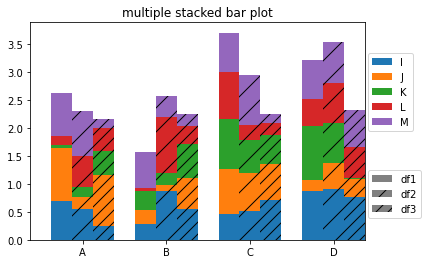

In [1]:
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt


def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot", H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot.
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns)
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall:  # for each data frame
        axe = df.plot(
            kind="bar",
            linewidth=0,
            stacked=True,
            ax=axe,
            legend=False,
            grid=False,
            **kwargs
        )  # make bar plots

    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col):  # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i + n_col]):
            for rect in pa.patches:  # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col))  #edited part
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n = []
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    axe.add_artist(l1)
    return axe


# create fake dataframes
df1 = pd.DataFrame(
    np.random.rand(4, 5),
    index=["A", "B", "C", "D"],
    columns=["I", "J", "K", "L", "M"]
)
df2 = pd.DataFrame(
    np.random.rand(4, 5),
    index=["A", "B", "C", "D"],
    columns=["I", "J", "K", "L", "M"]
)
df3 = pd.DataFrame(
    np.random.rand(4, 5),
    index=["A", "B", "C", "D"],
    columns=["I", "J", "K", "L", "M"]
)

# Then, just call :
plot_clustered_stacked([df1, df2, df3], ["df1", "df2", "df3"])


0
2
4


<AxesSubplot:title={'center':'multiple stacked bar plot'}>

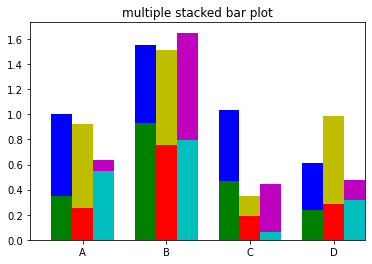

In [25]:
from itertools import islice, cycle
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

my_colors = {}
for i in range(6):
    my_colors[i] = {}

my_colors[0][0] = 'g'
my_colors[0][1] = 'b'
my_colors[2][0] = 'r'
my_colors[2][1] = 'y'
my_colors[4][0] = 'c'
my_colors[4][1] = 'm'


def plot_clustered_stacked_revised(dfall, labels=None, title="multiple stacked bar plot", H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot.
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    df_count = len(dfall)
    df_column_count = len(dfall[0].columns)
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall:  # for each data frame
        # my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(df)))
        axe = df.plot(
            kind="bar",
            linewidth=0,
            stacked=True,
            ax=axe,
            legend=False,
            grid=False,
            **kwargs,
        )  # make bar plots

    h, l = axe.get_legend_handles_labels()  # get the handles we want to modify
    for col in range(0, df_count * df_column_count, df_column_count):  # len(h) = n_col * n_df
        print(col)
        for index, pa in enumerate(h[col:col + df_column_count]):
            for rect in pa.patches:  # for each index
                rect.set_x(rect.get_x() + 1 / float(df_count + 1) * col / float(df_column_count))
                rect.set_hatch(H * int(col / df_column_count))  #edited part
                rect.set_width(1 / float(df_count + 1))
                rect.set_color(my_colors[col][index])

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(df_count + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)
    axe.set_title(title)

    # Add invisible data to add another legend
    # n = []
    # for i in range(n_df):
    #     n.append(axe.bar(0, 0, color="gray", hatch=H * i))
    #
    # l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    # if labels is not None:
    #     l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    # axe.add_artist(l1)
    return axe


def choose_color(column, index):
    if column == 0 & index % 2 == 0:
        return 'g'
    if index % 2 == 0:
        return 'blue'
    return 'red'

# create fake dataframes
df1 = pd.DataFrame(
    np.random.rand(4, 2),
    index=["A", "B", "C", "D"],
    columns=["I", "J"]
)
df2 = pd.DataFrame(
    np.random.rand(4, 2),
    index=["A", "B", "C", "D"],
    columns=["I", "J"]
)
df3 = pd.DataFrame(
    np.random.rand(4, 2),
    index=["A", "B", "C", "D"],
    columns=["I", "J"]
)

# Then, just call :
plot_clustered_stacked_revised([df1, df2, df3], ["df1", "df2", "df3"], cmap=plt.cm.viridis)


<AxesSubplot:xlabel='gender'>

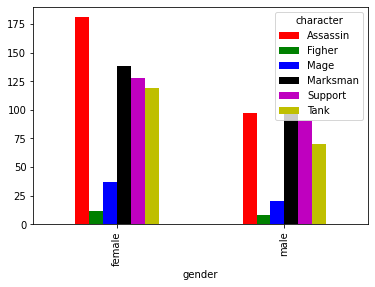

In [11]:
import pandas as pd

# try to simulate your data
characters = 'Tank Support Marksman Mage Figher Assassin'.split(' ')
random_weight = abs(np.random.randn(len(characters)))
random_weight = random_weight / random_weight.sum()
gender = 'male female'.split(' ')

index1 = np.random.choice(characters, size=1000, p=random_weight)
index2 = np.random.choice(gender, size=1000, p=[0.4, 0.6])
multi_index = pd.MultiIndex.from_tuples(list(zip(index1, index2)), names=['character', 'gender'])

data = pd.DataFrame(np.random.randn(1000), columns=['value'], index=multi_index)
data.reset_index(inplace=True)

# do your groupby
group_counts = data.groupby(['character', 'gender']).count().reset_index()
# do pivot table
table = pd.pivot_table(group_counts, index='gender', columns='character', values='value')
# set your own colors here
table.plot(kind='bar', color=['r', 'g', 'b', 'k', 'm', 'y'])